![alternative text](../../data/k-means_chatpt.png)


In [1]:
import numpy as np
from matplotlib.pylab import plt
import copy
from sklearn.datasets import make_moons


In [3]:
# Generate synthetic data
np.random.seed(42)

data, Y = make_moons(n_samples=5000, noise=0.3, random_state=42)



num_samples = len(data)
num_features = len(data)
num_clusters = 2


Text(0.5, 1.0, 'data for clustering')

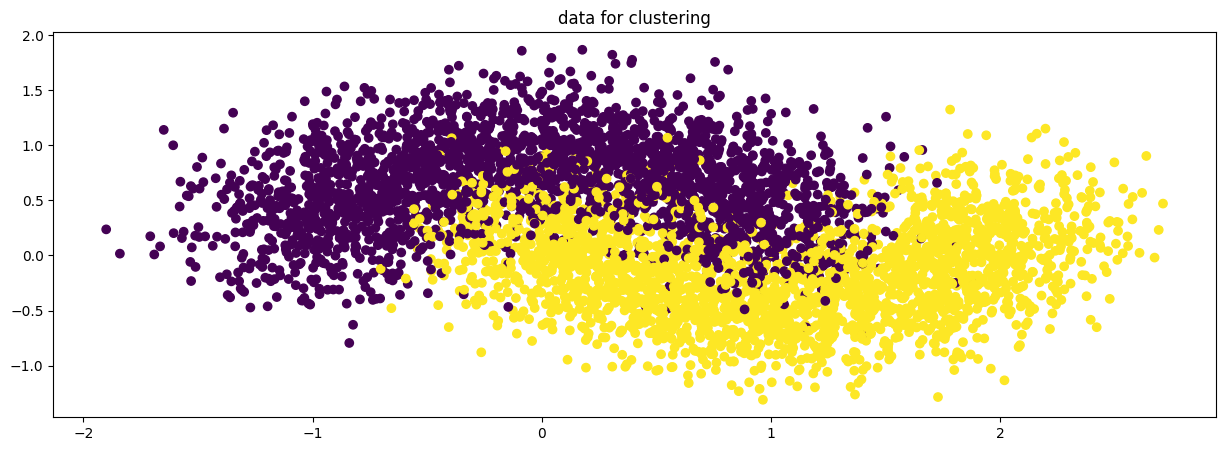

In [4]:
plt.figure(figsize=(15,5))
plt.scatter(data[:,0],data[:,1],c=Y)
plt.title("data for clustering")

In [5]:
# Criterias for stopping 
num_epochs = 100
center_thr = 0.01

In [14]:
def check_center_movement(centers, previous, center_thr=0.1):
    '''
    checking if the clusters center are moving from their previous locations. As a way to break the training early. 
    '''
    distances = []
    distances = np.sqrt(np.sum((centers - previous) ** 2, axis=1))
    if distances.mean() <= center_thr:

        return True
    return False

def k_means(data, num_clusters, epochs,center_thr):
    # Initialize cluster centers randomly by selecting num_cluster points from the data 
    centers = data[np.random.choice(num_samples, num_clusters, replace=False)]

    new_clusters = []
    for epoch in range(num_epochs):
        # Calculate distances between data points and cluster centers - vectorized implementation 
        distances = np.sqrt(np.sum((data[:, None] - centers[None, :]) ** 2, axis=2)) # notice the added dimension to allow broadcasting 

        # For every data point, we have its distance from each cluster. n x m 
        # Now, looping through this, we want to find the min distance index for each data point. 
        # Assign each data point to the nearest cluster
        assignments = np.argmin(distances, axis=1)
        # keeping track of the previous centers for checking if the clusters are moving later
        previouse_centers = copy.deepcopy(centers)

        # Update cluster centers - training 
        # Take the collection of data assigned to each cluster and find their mean data point. 
        # Assign that mean data point as the new cluster. Do this for all clusters. 
        new_clusters = []
        for cluster_idx in range(num_clusters):
            cluster_data = data[assignments == cluster_idx]
            if len(cluster_data) > 0:
                centers[cluster_idx] = cluster_data.mean(axis=0)
                new_clusters.append(cluster_data)
        # check if the clusters are moving 
        moved = check_center_movement(centers, previouse_centers, center_thr)
        if moved and epoch>3:
            print("centers are not moving much, breaking early at epoch {}".format(epoch))
            break
    # return the new clusters and the associated data with each cluster
    return new_clusters, centers



In [15]:

new_clusters, new_centers  = k_means(data, num_clusters, epochs= num_epochs ,center_thr=center_thr)


centers are not moving much, breaking early at epoch 5


Text(0.5, 1.0, 'data for clustering')

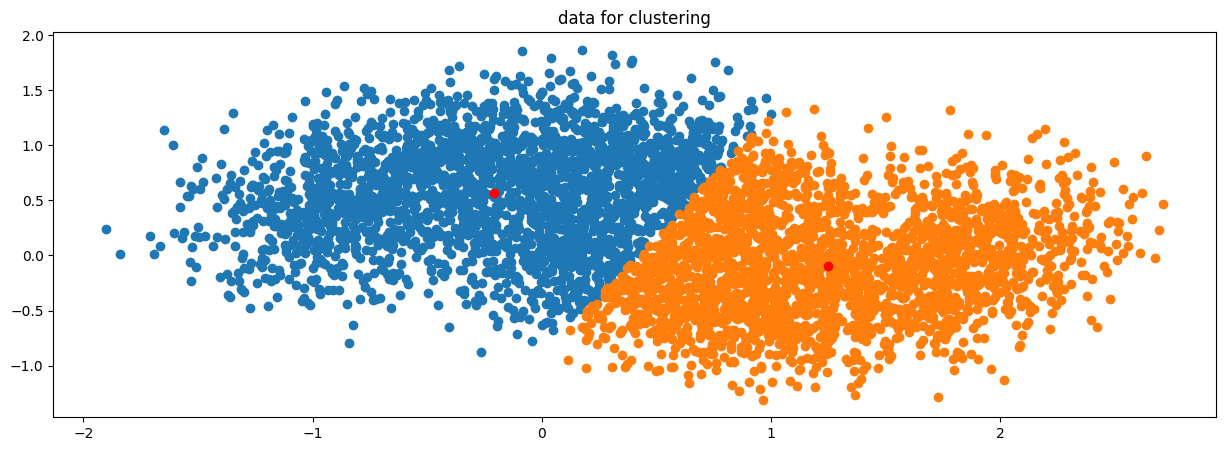

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(new_clusters[0][:,0],new_clusters[0][:,1])
plt.scatter(new_clusters[1][:,0],new_clusters[1][:,1])

plt.scatter(new_centers[:,0],new_centers[:,1],c='r')
plt.title("data for clustering")

behavior of k-means is similar to logistric/linear regression decision boundary